# Detection of Breast Cancer using Machine Learning

Breast Cancer Detection is a classification task aimed at predicting whether a breast mass is malignant or benign, based on various computed features from cell nuclei in a digitized image.

Dataset Overview

The dataset used for this task contains features derived from a fine needle aspirate (FNA) of breast masses. These features describe characteristics of the cell nuclei present in the images and can help distinguish between benign and malignant diagnoses.

Key Information:
ID number: A unique identifier for each sample.
Diagnosis: The target variable, where:
'M' represents Malignant
'B' represents Benign

Features Computed for Each Cell Nucleus:

Radius: The mean distance from the center to points on the perimeter of the nucleus.

Texture: The standard deviation of gray-scale values.

Perimeter: The perimeter of the nucleus.

Area: The area of the nucleus.

Smoothness: A measure of local variation in radius lengths.

Compactness: Computed as (Perimeter² / Area) - 1.0.

Concavity: Describes the severity of concave portions of the contour.

Concave points: Number of concave portions of the nucleus contour.

Symmetry: Measures the symmetry of the nucleus.

Fractal Dimension: Approximates the "coastline" of the nucleus using fractal geometry.

Project Objective

This project aims to build a machine learning model capable of predicting breast cancer diagnosis using the aforementioned features. The goal is to assist in the early detection and diagnosis of breast cancer, which can be pivotal in determining the appropriate treatment plan.

Approach

Data Preprocessing: Cleaning the dataset, handling missing values, and normalizing or scaling the features.

Model Training: Testing various machine learning models to predict the diagnosis and using techniques like cross-validation and hyperparameter tuning to improve performance.

Model Evaluation: Evaluating the model's performance using accuracy, precision, recall, and F1 score metrics.

Model Saving: Saving the best-performing model for future use.

Conclusion

By training machine learning models on this dataset, it is possible to develop a predictive model that can significantly assist in the early detection and diagnosis of breast cancer, providing a valuable tool for medical professionals.



## Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

## Reading the data 

In [2]:
BreastCancerData = pd.read_csv(r"C:\Users\ADMIN\Documents\Diff. format of files\Breast_Cancer_Dataset.csv")

In [3]:
BreastCancerData

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Data Information

In [4]:
BreastCancerData.shape

(569, 33)

In [5]:
BreastCancerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The data indicates that the 'diagnosis' column is the sole column with an object data type, consisting of 569 non-null entries.

## Displaying all columns 

In [6]:
for column in BreastCancerData.columns:
    print(column)

id
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
Unnamed: 32


## Displaying the first five rows in our data

In [7]:
BreastCancerData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


A close examination of the dataset reveals that this is a supervised machine learning task, as our predictions are based on the 'diagnosis' column.

## Checking for nulls

In [8]:
missing_values = BreastCancerData.isnull().sum()

for column, count in missing_values.items():
    if count > 0:
        print(f"{column}: {count} missing values")

Unnamed: 32: 569 missing values


## Dropping features which has Nulls and Useless features

In [9]:
BreastCancerData = BreastCancerData.drop(columns = ['Unnamed: 32' , 'id'] , axis = 1)

Unnamed column has nulls and the id column is useless for our prediction

## Columns check after dropping

In [10]:
BreastCancerData.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Now we can see the data but without the column 'Unamed: 32' and column 'id'

## Count values of the target

In [11]:
BreastCancerData['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

## Descriptive Statistics of the Breast Cancer Data

In [12]:
BreastCancerData.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Checking for outliers

In [13]:
outliers_info = {}
BreastCancerData_cleaned = BreastCancerData.copy()  # Create a copy of the original DataFrame

for column in BreastCancerData.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = BreastCancerData[column].quantile(0.25)
    Q3 = BreastCancerData[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    outlier_count = BreastCancerData[(BreastCancerData[column] < lower_bound) | (BreastCancerData[column] > upper_bound)].shape[0]
    outliers_info[column] = outlier_count

    # Remove outliers by filtering the DataFrame directly
    BreastCancerData_cleaned = BreastCancerData_cleaned[
        (BreastCancerData_cleaned[column] >= lower_bound) & (BreastCancerData_cleaned[column] <= upper_bound)
    ]

# Display outlier information
for i, j in outliers_info.items():
    if j > 0:
        print(f'{i} has : {j} outliers')

radius_mean has : 14 outliers
texture_mean has : 7 outliers
perimeter_mean has : 13 outliers
area_mean has : 25 outliers
smoothness_mean has : 6 outliers
compactness_mean has : 16 outliers
concavity_mean has : 18 outliers
concave points_mean has : 10 outliers
symmetry_mean has : 15 outliers
fractal_dimension_mean has : 15 outliers
radius_se has : 38 outliers
texture_se has : 20 outliers
perimeter_se has : 38 outliers
area_se has : 65 outliers
smoothness_se has : 30 outliers
compactness_se has : 28 outliers
concavity_se has : 22 outliers
concave points_se has : 19 outliers
symmetry_se has : 27 outliers
fractal_dimension_se has : 28 outliers
radius_worst has : 17 outliers
texture_worst has : 5 outliers
perimeter_worst has : 15 outliers
area_worst has : 35 outliers
smoothness_worst has : 7 outliers
compactness_worst has : 16 outliers
concavity_worst has : 12 outliers
symmetry_worst has : 23 outliers
fractal_dimension_worst has : 24 outliers


## Plot the Outliers Using Box plot

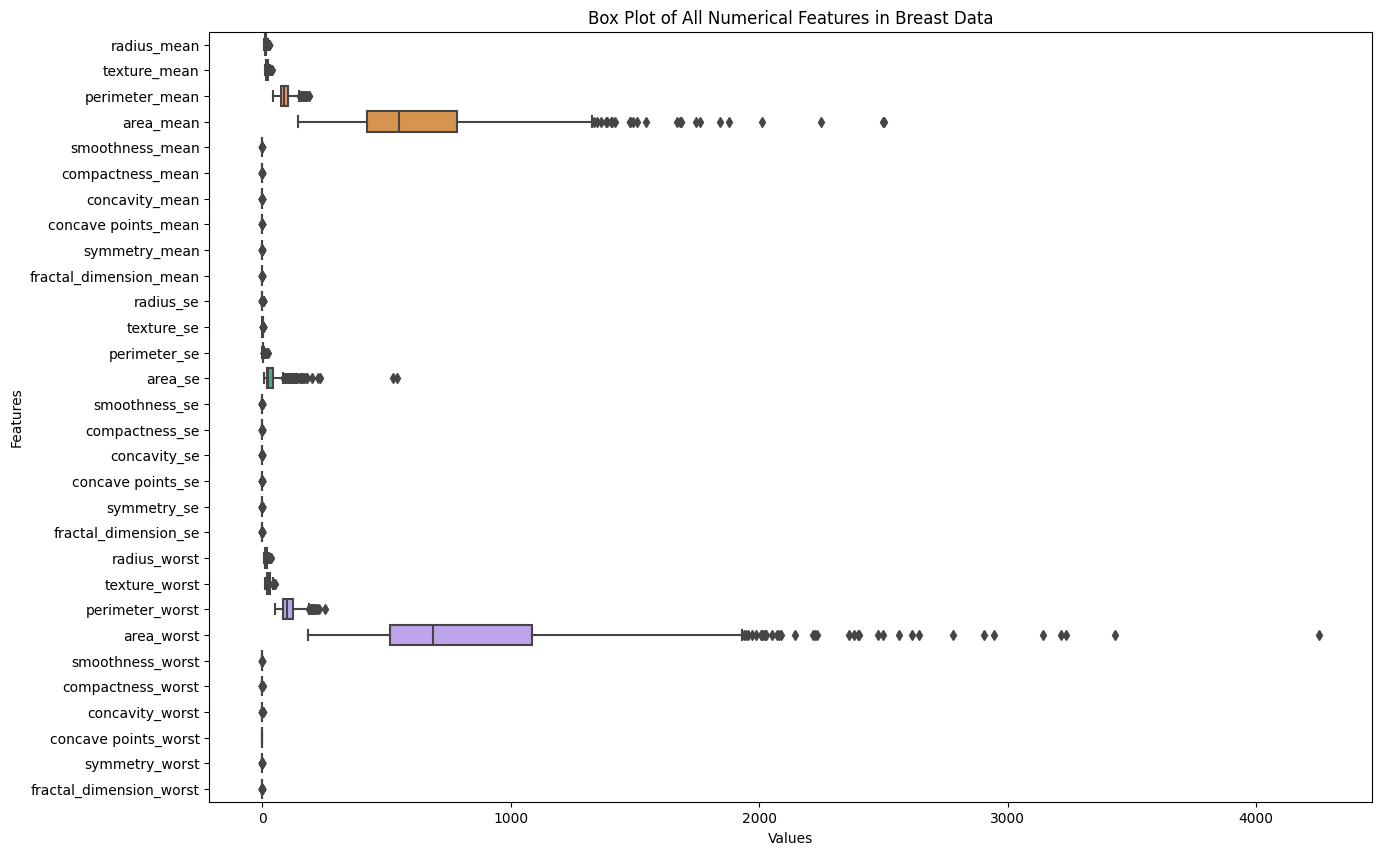

In [14]:
# Create a box plot for all numerical columns
plt.figure(figsize=(15, 10))  # Set figure size
sns.boxplot(data=BreastCancerData, orient="h")  # Horizontal box plot
plt.title('Box Plot of All Numerical Features in Breast Data')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

 To visualize the boxplots and understand the outliers, I divided the columns into three groups

In [15]:
list1 = BreastCancerData[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean']]

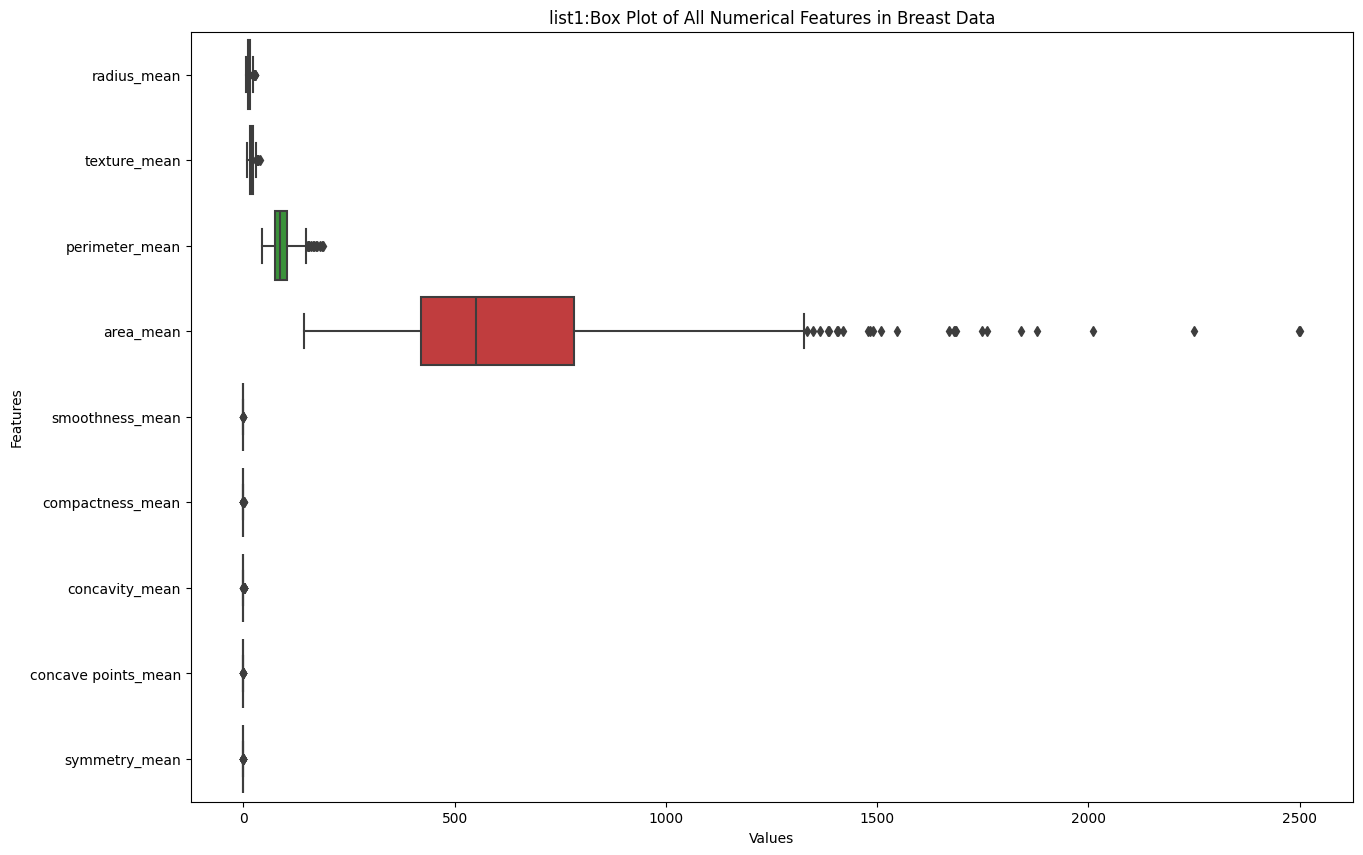

In [16]:
plt.figure(figsize=(15, 10))  # Set figure size
sns.boxplot(data=list1, orient="h")# Horizontal box plot
plt.title('list1:Box Plot of All Numerical Features in Breast Data')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

In [17]:
list2 = BreastCancerData[['fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',]]

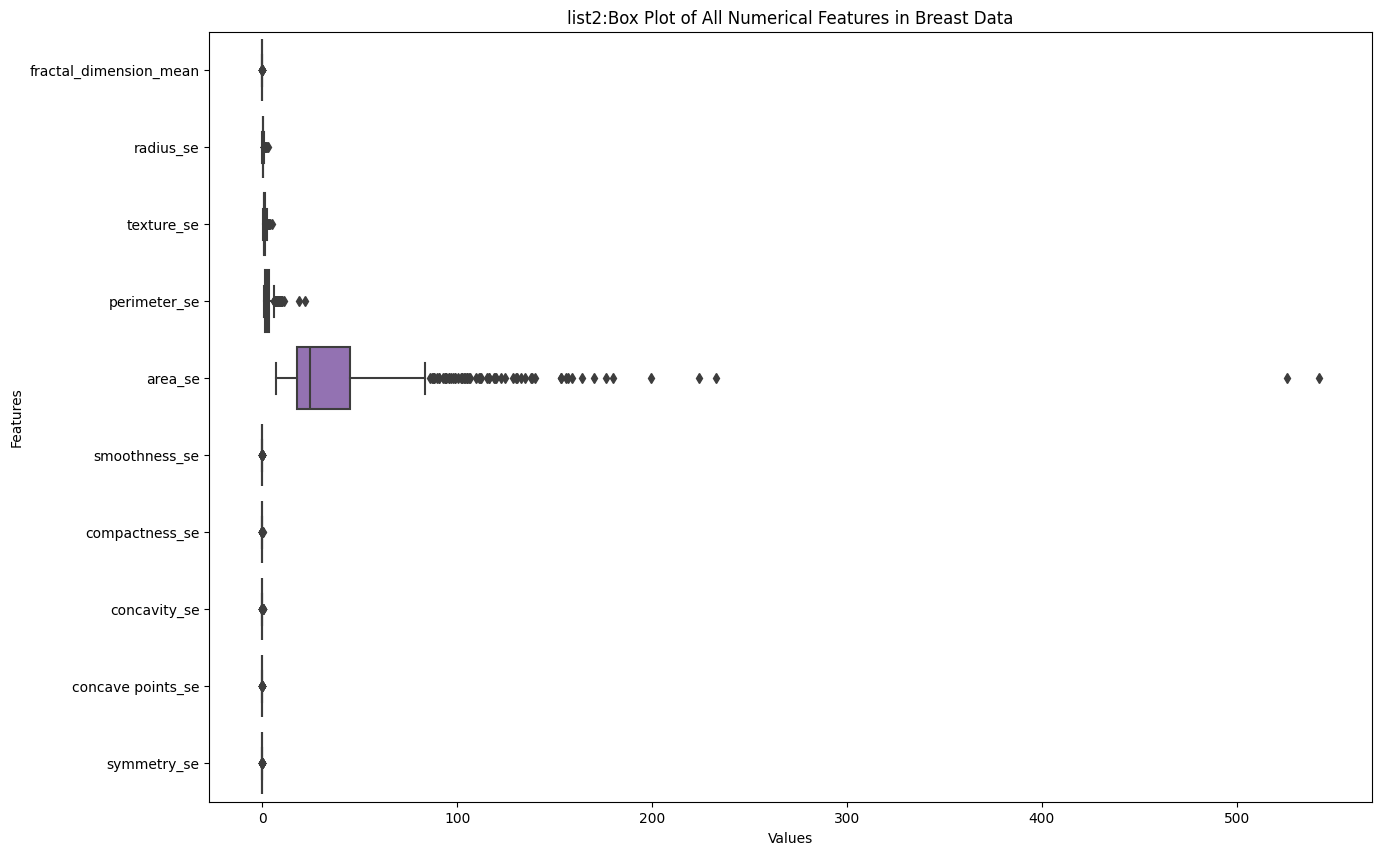

In [18]:
plt.figure(figsize=(15, 10))  # Set figure size
sns.boxplot(data=list2, orient="h")# Horizontal box plot
plt.title('list2:Box Plot of All Numerical Features in Breast Data')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

In [19]:
list3 = BreastCancerData[['fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

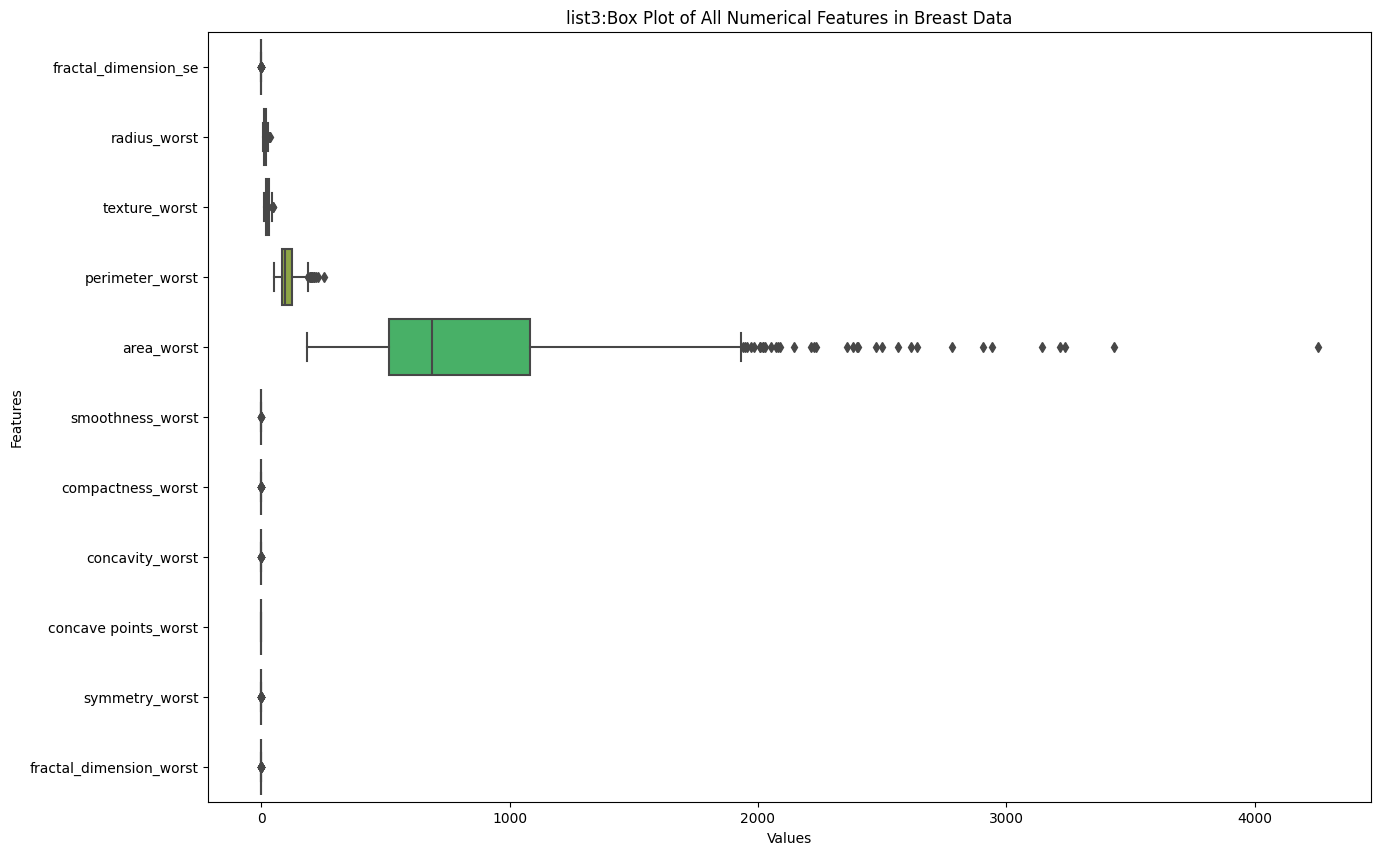

In [20]:
plt.figure(figsize=(15, 10))  # Set figure size
sns.boxplot(data=list3, orient="h")# Horizontal box plot
plt.title('list3:Box Plot of All Numerical Features in Breast Data')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

## Display the shape of the original and cleaned DataFrames

In [21]:
print(f"Original DataFrame shape: {BreastCancerData.shape}")
print(f"Cleaned DataFrame shape: {BreastCancerData_cleaned.shape}")

Original DataFrame shape: (569, 31)
Cleaned DataFrame shape: (398, 31)


## Encoding

In [22]:
BreastCancerData_cleaned['diagnosis'] = BreastCancerData_cleaned['diagnosis'].apply(lambda val:1 if val =='M' else 0)

In [23]:
BreastCancerData_cleaned['diagnosis'].value_counts()

diagnosis
0    300
1     98
Name: count, dtype: int64

## Correlation Matrix

In [24]:
correlation_matrix = BreastCancerData_cleaned.corr()
correlation_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.680705,0.388596,0.695835,0.698005,0.271570,0.514346,0.710567,0.752190,0.243588,...,0.761081,0.437909,0.768194,0.773626,0.396847,0.533996,0.653300,0.726639,0.347406,0.290821
radius_mean,0.680705,1.000000,0.280796,0.998113,0.992047,0.055311,0.442360,0.658031,0.755607,0.075653,...,0.971286,0.273847,0.964851,0.957772,0.087209,0.416464,0.563240,0.682235,0.137655,-0.014583
texture_mean,0.388596,0.280796,1.000000,0.285880,0.288688,-0.046879,0.181078,0.295111,0.239147,0.051037,...,0.311152,0.914721,0.316562,0.317755,0.069886,0.216026,0.274070,0.238186,0.076977,0.060915
perimeter_mean,0.695835,0.998113,0.285880,1.000000,0.990235,0.093196,0.492915,0.696240,0.785954,0.102371,...,0.972912,0.280552,0.971558,0.959710,0.121237,0.460901,0.599672,0.712906,0.160178,0.027877
area_mean,0.698005,0.992047,0.288688,0.990235,1.000000,0.058280,0.428703,0.664847,0.758145,0.077918,...,0.969353,0.280953,0.962721,0.971053,0.102255,0.400703,0.559618,0.671695,0.136700,-0.014754
smoothness_mean,0.271570,0.055311,-0.046879,0.093196,0.058280,1.000000,0.675183,0.463982,0.522678,0.494062,...,0.122928,0.020158,0.146367,0.125280,0.803945,0.432375,0.372220,0.463910,0.375969,0.504310
compactness_mean,0.514346,0.442360,0.181078,0.492915,0.428703,0.675183,1.000000,0.837473,0.805062,0.470457,...,0.487260,0.203987,0.543912,0.471562,0.588434,0.861979,0.780565,0.784528,0.424398,0.656342
concavity_mean,0.710567,0.658031,0.295111,0.696240,0.664847,0.463982,0.837473,1.000000,0.930271,0.365858,...,0.697135,0.323000,0.737467,0.701045,0.490384,0.772677,0.904941,0.861916,0.363584,0.470354
concave points_mean,0.752190,0.755607,0.239147,0.785954,0.758145,0.522678,0.805062,0.930271,1.000000,0.365482,...,0.792484,0.272741,0.816780,0.790517,0.509263,0.692292,0.794996,0.908179,0.360800,0.381099
symmetry_mean,0.243588,0.075653,0.051037,0.102371,0.077918,0.494062,0.470457,0.365858,0.365482,1.000000,...,0.128278,0.079260,0.148892,0.128689,0.381236,0.339391,0.292389,0.316389,0.675715,0.298244


## Heatmap

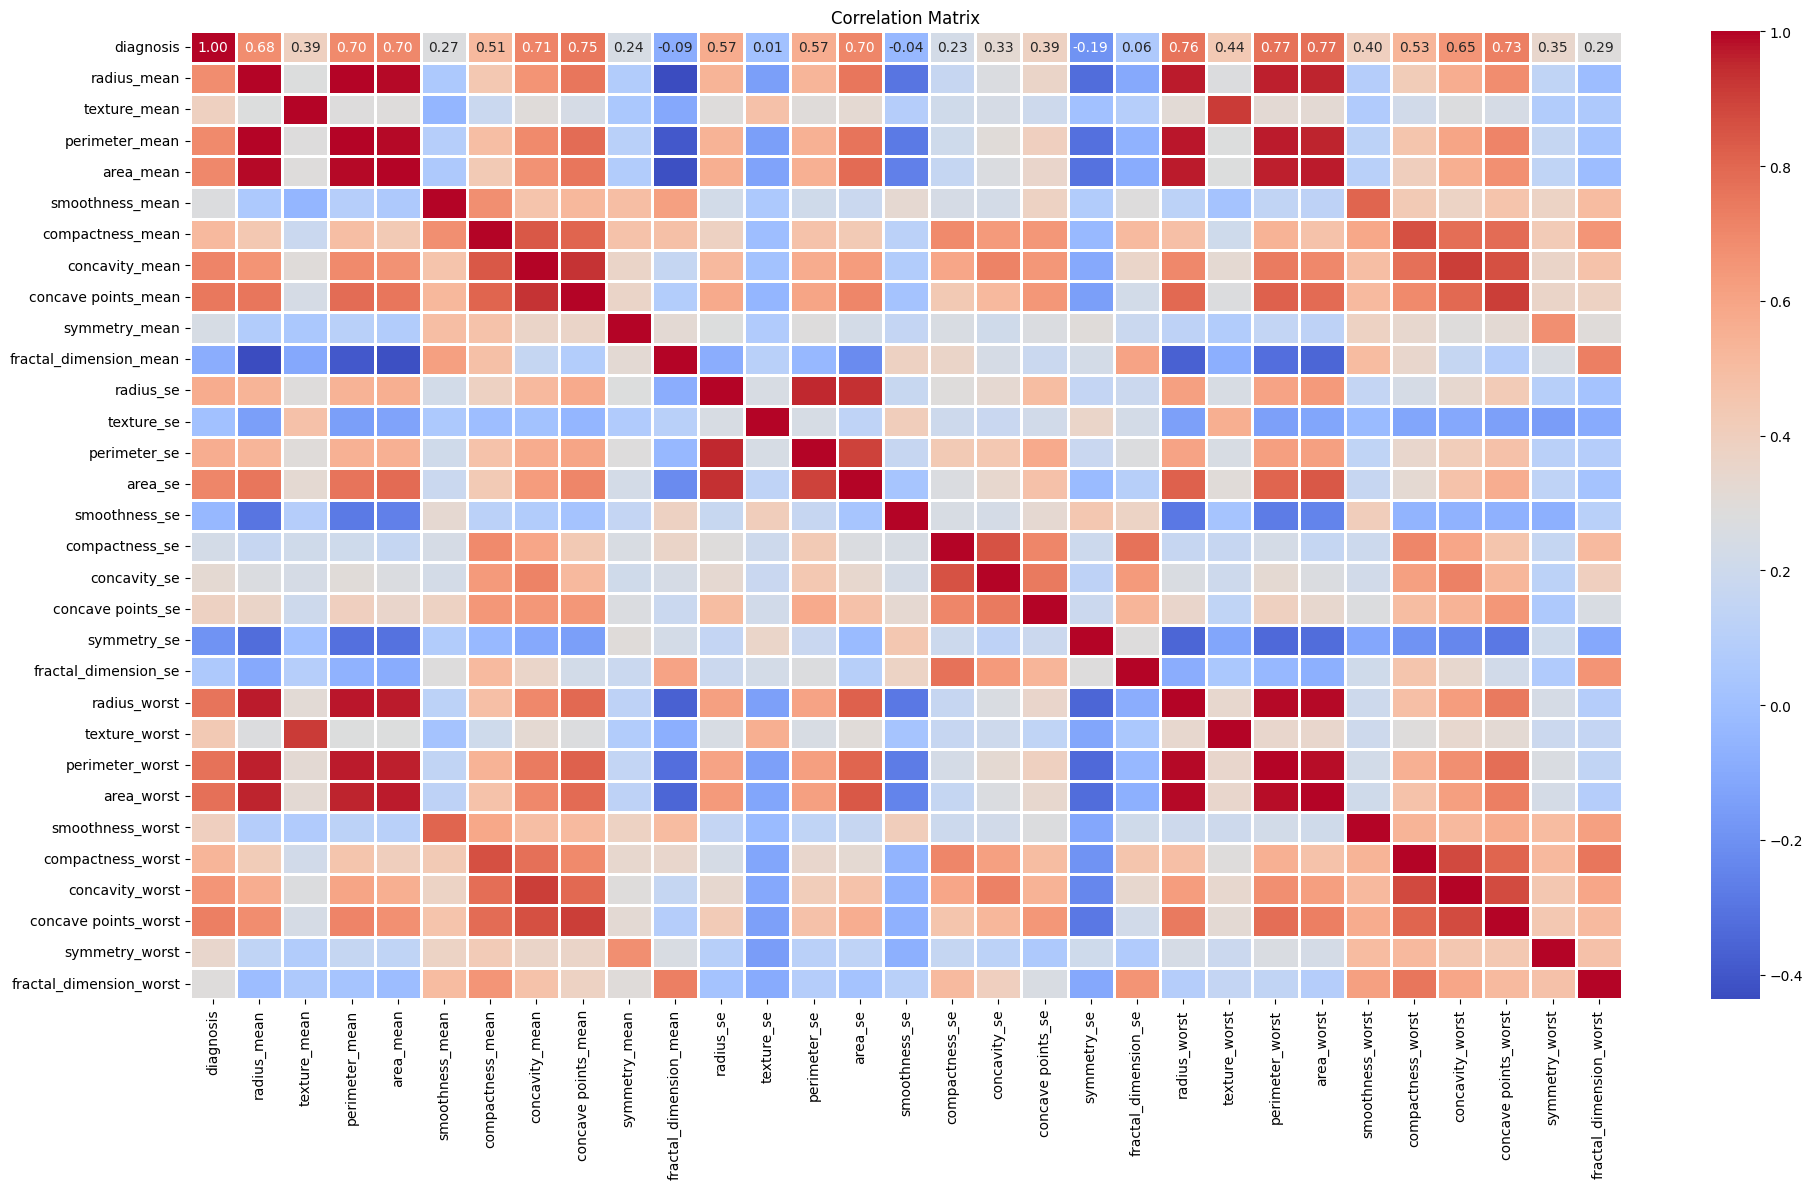

In [25]:
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, linewidths=1, annot=True, fmt = ".2f",cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## Splitting Data

In [26]:
X = BreastCancerData_cleaned.drop(['diagnosis'],axis = 1)
y = BreastCancerData_cleaned['diagnosis']

In [27]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
555,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,0.06127,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


In [28]:
y

6      1
7      1
10     1
11     1
13     1
      ..
554    0
555    0
558    0
560    0
566    1
Name: diagnosis, Length: 398, dtype: int64

In [29]:
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=42)

## Scaling

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building Models

In [31]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
}

In [32]:
results= {}
for name , clf in classifiers.items() : 
     clf.fit(X_train, y_train)  # Train the classifier
     y_pred = clf.predict(X_test)  # Make prediction
     print(f"Predictions of {name} : {y_pred}\n")
     # Calculate accuracy
     accuracy = accuracy_score(y_test, y_pred)
     results[name] = {
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, y_pred, zero_division=0)}

Predictions of Logistic Regression : [0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 1]

Predictions of Support Vector Classifier : [0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0]

Predictions of K-Nearest Neighbors : [0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0]

Predictions of Decision Tree Classifier : [0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0]

Predictions of Random Forest Classifier : [0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0
 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0

In [33]:
# Print type of results
print("Results type:", type(results))

Results type: <class 'dict'>


##  Display results

In [34]:
for name, metrics in results.items():    
    print(f"### {name} ###")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("\n")

### Logistic Regression ###
Accuracy: 0.9500
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.96      0.88      0.92        25

    accuracy                           0.95        80
   macro avg       0.95      0.93      0.94        80
weighted avg       0.95      0.95      0.95        80



### Support Vector Classifier ###
Accuracy: 0.9625
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        55
           1       1.00      0.88      0.94        25

    accuracy                           0.96        80
   macro avg       0.97      0.94      0.95        80
weighted avg       0.96      0.96      0.96        80



### K-Nearest Neighbors ###
Accuracy: 0.9500
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        55
           1       1.00

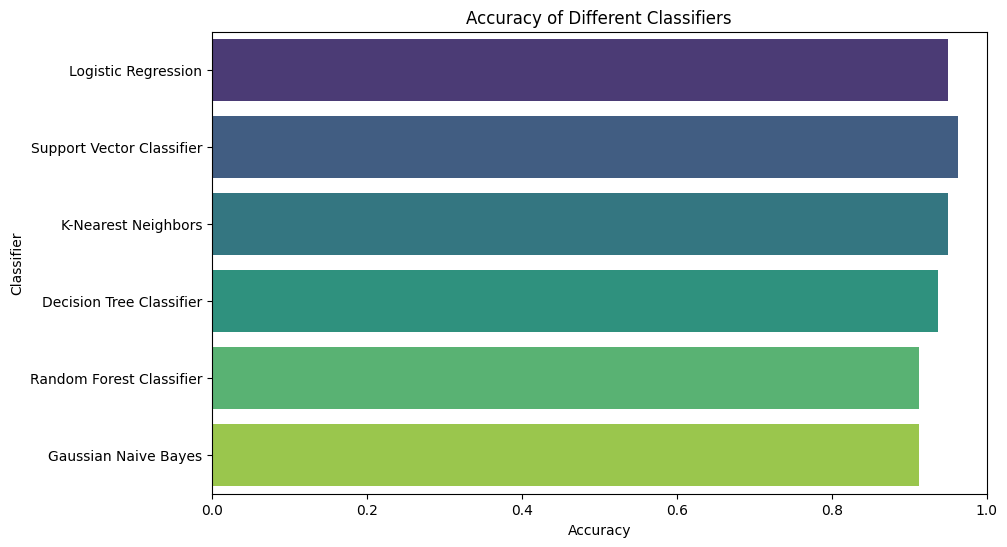

In [35]:
# Visualization of classifier accuracy
classifier_names = list(results.keys())
accuracies = [results[name]['Accuracy'] for name in classifier_names]

# Create a DataFrame for visualization
accuracy_data = pd.DataFrame({'Classifier': classifier_names, 'Accuracy': accuracies})

# Plot the accuracy using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Classifier', data=accuracy_data, palette='viridis')
plt.title('Accuracy of Different Classifiers')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.xlim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

## Find the best classifier based on accuracy

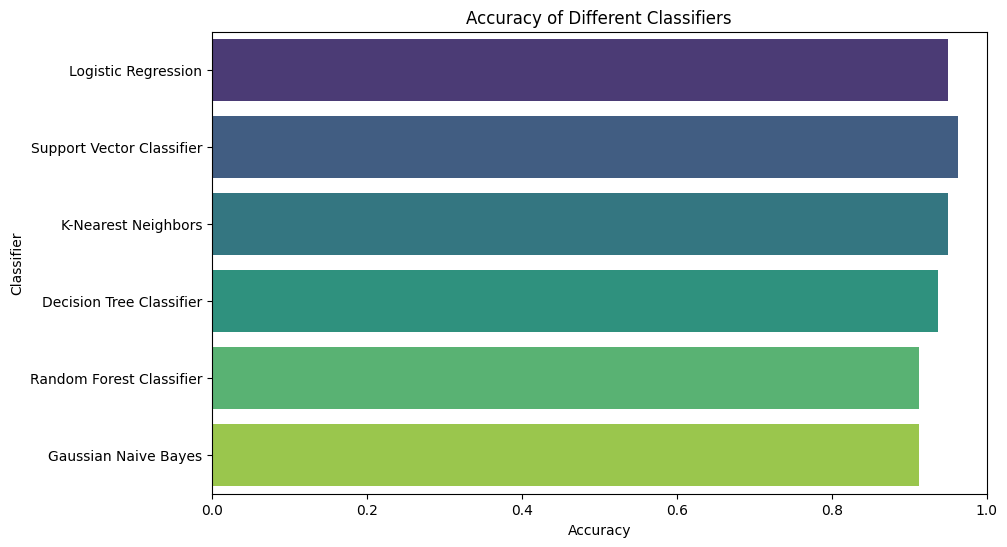

The best model is Support Vector Classifier with an accuracy of 0.96


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'results' dictionary contains classifier names and their accuracy scores

# Extract classifier names and accuracies
classifier_names = list(results.keys())
accuracies = [results[name]['Accuracy'] for name in classifier_names]

# Create a DataFrame for visualization
accuracy_data = pd.DataFrame({'Classifier': classifier_names, 'Accuracy': accuracies})

# Plot the accuracy using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Classifier', data=accuracy_data, palette='viridis')
plt.title('Accuracy of Different Classifiers')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.xlim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

# Select the best model based on the highest accuracy
best_model_name = accuracy_data.loc[accuracy_data['Accuracy'].idxmax(), 'Classifier']
best_model_accuracy = accuracy_data['Accuracy'].max()

print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.2f}")


In [37]:
best_classifier_name = max(results, key=lambda name: results[name]['Accuracy'])
print(f"\nBest Classifier: {best_classifier_name}")


Best Classifier: Support Vector Classifier


In [38]:
best_model = classifiers[best_classifier_name]
best_model.fit(X_train, y_train)

SVC()

In [39]:
y_pred_best = best_model.predict(X_test)
y_pred_best

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [40]:
print(f"Classification Report for {best_classifier_name}:")
print(classification_report(y_test, y_pred_best, zero_division=0))

Classification Report for Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        55
           1       1.00      0.88      0.94        25

    accuracy                           0.96        80
   macro avg       0.97      0.94      0.95        80
weighted avg       0.96      0.96      0.96        80



In [41]:
best_classifier_accuracy = results[best_classifier_name]['Accuracy']
print(f"Accuracy: {best_classifier_accuracy*100:.2f}%\n")

Accuracy: 96.25%



## Save

In [42]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'svc_model.pkl')

['svc_model.pkl']